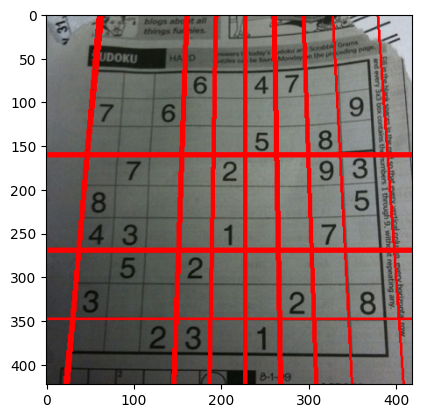

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img[...,::-1])

# probabilistic method

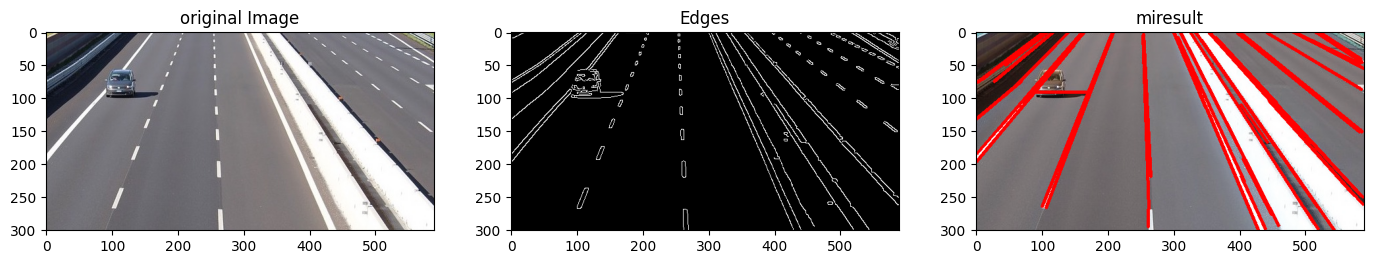

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read image 
original_img = cv2.imread('images/highway-lanes.jpg', cv2.IMREAD_COLOR) # road.png is the filename
img = original_img.copy()
blured = cv2.GaussianBlur(original_img, (5,5),0)
# Convert the image to gray-scale
gray = cv2.cvtColor(blured, cv2.COLOR_BGR2GRAY)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=50)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
# Show result
plt.figure(figsize=[17,8])
plt.subplot(131);plt.imshow(original_img[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(edges, cmap='gray');plt.title("Edges");
plt.subplot(133);plt.imshow(img, cmap='gray');plt.title("miresult");